<a href="https://colab.research.google.com/github/HakujouRyu/DS-Unit-2-Regression-Classification/blob/master/module4/assignment_regression_classification_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 4


## Assignment

- [ ] Watch Aaron's [video #1](https://www.youtube.com/watch?v=pREaWFli-5I) (12 minutes) & [video #2](https://www.youtube.com/watch?v=bDQgVt4hFgY) (9 minutes) to learn about the mathematics of Logistic Regression.
- [ ] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Begin with baselines for classification.
- [ ] Use scikit-learn for logistic regression.
- [ ] Get your validation accuracy score.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

---


## Stretch Goals

- [ ] Add your own stretch goal(s) !
- [ ] Clean the data. For ideas, refer to [The Quartz guide to bad data](https://github.com/Quartz/bad-data-guide),  a "reference to problems seen in real-world data along with suggestions on how to resolve them." One of the issues is ["Zeros replace missing values."](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values)
- [ ] Make exploratory visualizations.
- [ ] Do one-hot encoding. For example, you could try `quantity`, `basin`, `extraction_type_class`, and more. (But remember it may not work with high cardinality categoricals.)
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Get and plot your coefficients.
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).

---

## Data Dictionary 

### Features

Your goal is to predict the operating condition of a waterpoint for each record in the dataset. You are provided the following set of information about the waterpoints:

- `amount_tsh` : Total static head (amount water available to waterpoint)
- `date_recorded` : The date the row was entered
- `funder` : Who funded the well
- `gps_height` : Altitude of the well
- `installer` : Organization that installed the well
- `longitude` : GPS coordinate
- `latitude` : GPS coordinate
- `wpt_name` : Name of the waterpoint if there is one
- `num_private` :  
- `basin` : Geographic water basin
- `subvillage` : Geographic location
- `region` : Geographic location
- `region_code` : Geographic location (coded)
- `district_code` : Geographic location (coded)
- `lga` : Geographic location
- `ward` : Geographic location
- `population` : Population around the well
- `public_meeting` : True/False
- `recorded_by` : Group entering this row of data
- `scheme_management` : Who operates the waterpoint
- `scheme_name` : Who operates the waterpoint
- `permit` : If the waterpoint is permitted
- `construction_year` : Year the waterpoint was constructed
- `extraction_type` : The kind of extraction the waterpoint uses
- `extraction_type_group` : The kind of extraction the waterpoint uses
- `extraction_type_class` : The kind of extraction the waterpoint uses
- `management` : How the waterpoint is managed
- `management_group` : How the waterpoint is managed
- `payment` : What the water costs
- `payment_type` : What the water costs
- `water_quality` : The quality of the water
- `quality_group` : The quality of the water
- `quantity` : The quantity of water
- `quantity_group` : The quantity of water
- `source` : The source of the water
- `source_type` : The source of the water
- `source_class` : The source of the water
- `waterpoint_type` : The kind of waterpoint
- `waterpoint_type_group` : The kind of waterpoint

### Labels

There are three possible values:

- `functional` : the waterpoint is operational and there are no repairs needed
- `functional needs repair` : the waterpoint is operational, but needs repairs
- `non functional` : the waterpoint is not operational

--- 

## Generate a submission

Your code to generate a submission file may look like this:

```python
# estimator is your model or pipeline, which you've fit on X_train

# X_test is your pandas dataframe or numpy array, 
# with the same number of rows, in the same order, as test_features.csv, 
# and the same number of columns, in the same order, as X_train

y_pred = estimator.predict(X_test)


# Makes a dataframe with two columns, id and status_group, 
# and writes to a csv file, without the index

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('your-submission-filename.csv', index=False)
```

If you're working locally, the csv file is saved in the same directory as your notebook.

If you're using Google Colab, you can use this code to download your submission csv file.

```python
from google.colab import files
files.download('your-submission-filename.csv')
```

---

## Set Up:

In [1]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module4')

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 19.30 MiB | 13.54 MiB/s, done.
Resolving deltas: 100% (71/71), done.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> origin/master
     |████████████████████████████████| 92kB 10.1MB/s 
     |████████████████████████████████| 112kB 29.8MB/s 
     |████████████████████████████████| 133kB 43.6MB/s 
     |████████████████████████████████| 57.7MB 1.4MB/s 
     |████████████████████████████████| 235kB 47.2MB/s 
     |████████████████████████████████| 614kB 47.6MB/s 
     |████████████████████████████████| 235kB 48.0MB/s 
     |████████████████████████████████| 307kB 50.8MB/s 
     |████████████████████████████████| 51kB 25.2MB/s 
     |████████████████████████████████| 215kB 50.9MB/s 
     |████████

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read the Tanzania Waterpumps data
# train_features.csv : the training set features
# train_labels.csv : the training set labels
# test_features.csv : the test set features
# sample_submission.csv : a sample submission file in the correct format
    
import pandas as pd

train_features = pd.read_csv('../data/waterpumps/train_features.csv')
train_labels = pd.read_csv('../data/waterpumps/train_labels.csv')
test_features = pd.read_csv('../data/waterpumps/test_features.csv')
sample_submission = pd.read_csv('../data/waterpumps/sample_submission.csv')

assert train_features.shape == (59400, 40)
assert train_labels.shape == (59400, 2)
assert test_features.shape == (14358, 40)
assert sample_submission.shape == (14358, 2)

# Assignment

Just a reminder of what the base var names are:
- train_features = pd.read_csv('../data/waterpumps/train_features.csv')
  - Train DF
- train_labels = pd.read_csv('../data/waterpumps/train_labels.csv')
  - Train Target
- test_features = pd.read_csv('../data/waterpumps/test_features.csv')
  - TEst DF
- sample_submission = pd.read_csv('../data/waterpumps/sample_submission.csv')
  - ...Sample Submission


## Importing

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import  LogisticRegressionCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from google.colab import files
# import pandas as pd #Already done, but w/e
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pf
import category_encoders as ce
from sklearn.feature_selection import f_regression, SelectKBest

## Data Exploration

### Peeking

In [34]:
train_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [35]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [36]:
test_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [37]:
sample_submission.head()
#What my sub should look like.

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,functional
4,49871,functional


### Cleaning

In [38]:
train_features.shape

(59400, 40)

In [39]:
train_features.isna().sum().nlargest(10)

scheme_name          28166
scheme_management     3877
installer             3655
funder                3635
public_meeting        3334
permit                3056
subvillage             371
id                       0
amount_tsh               0
date_recorded            0
dtype: int64

In [0]:
#Going to drop scheme_name as that is almost 50% NaN
train_features = train_features.drop(columns='scheme_name')

In [0]:
#Going to fill NaN with 'Unknown' for columns with names as values.
named_cols = ['scheme_management', 'installer', 'funder', 'subvillage']
train_features[named_cols] = train_features[named_cols].fillna('unknown')

In [0]:
#The last two are True/False columns and I would like to keep them, so I'll actually fill with unknown for those too and let the encoder sort them out.
train_features[['public_meeting', 'permit']] = train_features[['public_meeting', 'permit']].fillna('unknown')

In [45]:
train_features.isna().sum().nlargest(5)

id               0
amount_tsh       0
date_recorded    0
funder           0
gps_height       0
dtype: int64

### Test / Train Split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, random_state=42)

In [0]:
whole_train = train_features.copy()

### Baseline

Get the baseline using mode

In [0]:
y_train_base = train_labels['status_group']

In [0]:
majority = y_train_base.mode()[0]

In [99]:
majority

'functional'

In [0]:
y_pred_base = [majority] * len(y_train_base)

In [97]:
accuracy_score(y_train_base, y_pred_base)

0.543080808080808

### Quickie

In [0]:
quickie = LogisticRegressionCV()

In [0]:
q_features = X_train[['construction_year', 'region_code', 'gps_height']] 

In [116]:
quickie.fit(q_features, y_train['status_group'])

LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [0]:
q_preds = quickie.predict(X_test[['construction_year', 'region_code', 'gps_height']])

In [122]:
accuracy_score(q_preds, y_test['status_group'])

0.5591919191919192

Technically better than baseline! lol

In [126]:
y_test['status_group'].value_counts()

functional                 8098
non functional             5678
functional needs repair    1074
Name: status_group, dtype: int64

In [127]:
confusion_matrix(y_test['status_group'], q_preds, labels=['functional', 'non functional', 'functional needs repair'])

array([[7803,  295,    0],
       [5177,  501,    0],
       [1015,   59,    0]])

### Plotting

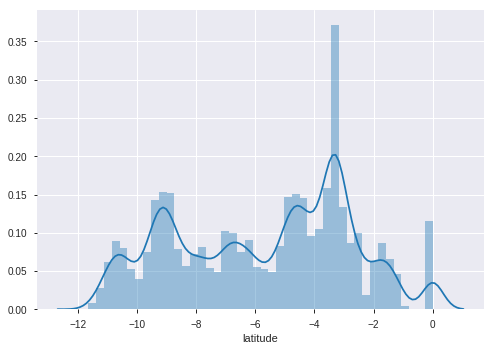

In [88]:
sns.distplot(train_features['latitude']);

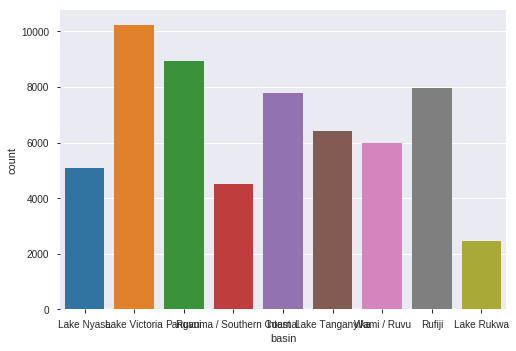

In [90]:
sns.countplot(train_features['basin']);

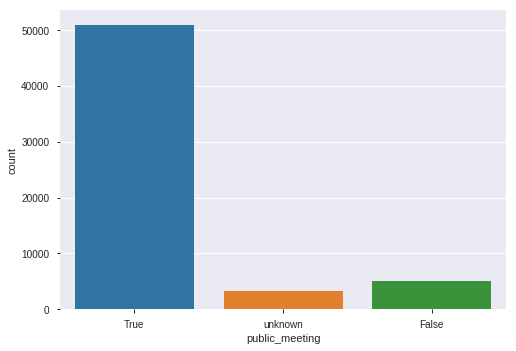

In [92]:
sns.countplot(train_features['public_meeting']);
#Most are

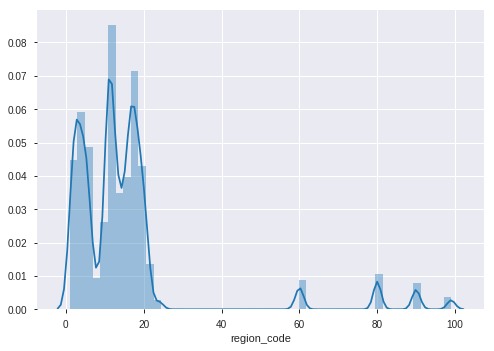

In [93]:
sns.distplot(train_features['region_code']);
#Maybe I'll bin these

### Binning

In [48]:
train_features.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1898
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19288
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               3
recorded_by                  1
scheme_management           13
permit                       3
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity

### Encoding

#### Target

Change the target to int for calculating mode

In [52]:
train_labels['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [0]:
train_labels_int = train_labels.replace({'functional': 1, 'non functional': 2, 'functional needs repair': 3})

In [77]:
train_labels_int.head()

,id,status_group
0,69572,1
1,8776,1
2,34310,1
3,67743,2
4,19728,1


#### Features

In [128]:
X_train.nunique()

id                       44550
amount_tsh                  95
date_recorded              349
funder                    1645
gps_height                2391
installer                 1860
longitude                43171
latitude                 43173
wpt_name                 29076
num_private                 59
basin                        9
subvillage               16672
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2071
population                 951
public_meeting               3
recorded_by                  1
scheme_management           13
permit                       3
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity

In [0]:
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train = encoder.fit_transform(X_train[['region', 'basin', 'public_meeting', 'scheme_management', 'permit', 'quality_group', 'extraction_type_group']])
X_test = encoder.transform(X_test[['region', 'basin', 'public_meeting', 'scheme_management', 'permit', 'quality_group', 'extraction_type_group']])

In [139]:
X_train.columns

Index(['region_Pwani', 'region_Mwanza', 'region_Singida', 'region_Ruvuma',
       'region_Arusha', 'region_Morogoro', 'region_Kilimanjaro',
       'region_Kagera', 'region_Manyara', 'region_Tanga', 'region_Mara',
       'region_Kigoma', 'region_Shinyanga', 'region_Tabora', 'region_Mbeya',
       'region_Iringa', 'region_Mtwara', 'region_Lindi', 'region_Rukwa',
       'region_Dodoma', 'region_Dar es Salaam', 'basin_Wami / Ruvu',
       'basin_Lake Victoria', 'basin_Internal', 'basin_Lake Nyasa',
       'basin_Pangani', 'basin_Lake Tanganyika', 'basin_Rufiji',
       'basin_Ruvuma / Southern Coast', 'basin_Lake Rukwa',
       'public_meeting_True', 'public_meeting_unknown', 'public_meeting_False',
       'scheme_management_VWC', 'scheme_management_WUG',
       'scheme_management_WUA', 'scheme_management_unknown',
       'scheme_management_Water authority', 'scheme_management_Parastatal',
       'scheme_management_Company', 'scheme_management_Water Board',
       'scheme_management_Privat

### Correlation

In [0]:
selector = SelectKBest(score_func=f_regression,k=15)

In [0]:
y_train_int = y_train.replace({'functional': 1, 'non functional': 2, 'functional needs repair': 3})

In [0]:
X_train_selected = selector.fit_transform(X_train, y_train_int['status_group'])
# X_test_selected = selector.transform(X_test)
# X_train_selected.shape, X_test_selected.shape

In [0]:
selected =selector.get_support()
cols = X_train.columns

In [152]:
cols[selected]

Index(['region_Arusha', 'region_Kigoma', 'region_Iringa', 'region_Mtwara',
       'region_Lindi', 'basin_Lake Nyasa', 'basin_Rufiji',
       'basin_Ruvuma / Southern Coast', 'basin_Lake Rukwa',
       'public_meeting_False', 'scheme_management_Water Board',
       'quality_group_good', 'quality_group_unknown',
       'extraction_type_group_nira/tanira', 'extraction_type_group_other'],
      dtype='object')

In [158]:
X_train[cols[selected]].corrwith(y_train_int['status_group'])

region_Arusha                       -0.065149
region_Kigoma                        0.071363
region_Iringa                       -0.144139
region_Mtwara                        0.063984
region_Lindi                         0.058391
basin_Lake Nyasa                    -0.062154
basin_Rufiji                        -0.070565
basin_Ruvuma / Southern Coast        0.075151
basin_Lake Rukwa                     0.059313
public_meeting_False                 0.061377
scheme_management_Water Board       -0.080903
quality_group_good                  -0.072682
quality_group_unknown                0.102557
extraction_type_group_nira/tanira   -0.073743
extraction_type_group_other          0.189965
dtype: float64

## Regression

#### Train only

In [0]:
model = LogisticRegressionCV()

In [160]:
model.fit(X_train[cols[selected]], y_train['status_group'])

LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [0]:
model_preds = model.predict(X_test[cols[selected]])

In [164]:
accuracy_score(model_preds, y_test['status_group'])

0.6272727272727273

#### Retrained on train and validation


In [0]:
whole_train_encoded = encoder.transform(whole_train[['region', 'basin', 'public_meeting', 'scheme_management', 'permit', 'quality_group', 'extraction_type_group']])

In [0]:
big_model = LogisticRegressionCV()

In [169]:
big_model.fit(whole_train_encoded[cols[selected]], train_labels['status_group'])

LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

# Kaggle Submission

## Generate a submission

Your code to generate a submission file may look like this:

```python
# estimator is your model or pipeline, which you've fit on X_train

# X_test is your pandas dataframe or numpy array, 
# with the same number of rows, in the same order, as test_features.csv, 
# and the same number of columns, in the same order, as X_train

y_pred = estimator.predict(X_test)


# Makes a dataframe with two columns, id and status_group, 
# and writes to a csv file, without the index

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('your-submission-filename.csv', index=False)
```

If you're working locally, the csv file is saved in the same directory as your notebook.

If you're using Google Colab, you can use this code to download your submission csv file.

```python
from google.colab import files
files.download('your-submission-filename.csv')
```

---

### Big Model

In [0]:
test_features =  encoder.transform(test_features[['region', 'basin', 'public_meeting', 'scheme_management', 'permit', 'quality_group', 'extraction_type_group']])

In [0]:
y_pred_big = big_model.predict(test_features[cols[selected]])

In [0]:
big_model_submission = sample_submission.copy()

In [0]:
big_model_submission['status_group'] = y_pred_big

In [0]:
big_model_submission.to_csv('big_model_sub.csv', index=False)

In [0]:
files.download('big_model_sub.csv')